In [ ]:
# https://arxiv.org/pdf/2010.06479.pdf
# Credit card fraud detection using machine learning: A survey

# https://arxiv.org/pdf/2001.08922.pdf

In [155]:
import time
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, auc, confusion_matrix, precision_recall_curve

In [84]:
RANDOM_STATE = 35

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [163]:
data_raw = pd.read_csv("processed_features.csv")


In [164]:
data_raw.head()

,account_id,device_id,balance,processed_at,is_fraud,age_range,number_of_selfies_sent,time_client,cash_out_type_1,cash_out_type_2,cash_out_type_3,cash_out_type_6
0,0,0,0.000167,1.542826e+09,0,0.0,5.0,8.783463e+05,1,0,0,0
1,1,0,0.000533,1.540263e+09,0,1.0,5.0,9.689721e+06,0,0,1,0
2,1,0,0.000347,1.542655e+09,0,1.0,5.0,1.208182e+07,0,0,1,0
3,1,0,0.000572,1.540837e+09,0,1.0,5.0,1.026435e+07,0,0,1,0
4,1,0,0.000346,1.540998e+09,0,1.0,5.0,1.042547e+07,0,0,1,0


In [165]:
data_raw.corr()

,account_id,device_id,balance,processed_at,is_fraud,age_range,number_of_selfies_sent,time_client,cash_out_type_1,cash_out_type_2,cash_out_type_3,cash_out_type_6
account_id,1.000000,0.936605,-0.115446,0.030805,-0.031733,0.014728,-0.011119,-0.124930,-0.024468,0.314274,-0.312839,0.001893
device_id,0.936605,1.000000,-0.120909,0.030237,-0.032270,0.010916,-0.010421,-0.128533,-0.021081,0.339309,-0.339272,0.001675
balance,-0.115446,-0.120909,1.000000,0.013672,-0.002463,0.041070,-0.015854,0.278847,0.019471,0.036898,-0.043073,-0.000271
processed_at,0.030805,0.030237,0.013672,1.000000,-0.006212,0.005170,-0.010542,0.034895,-0.000934,0.011392,-0.011319,-0.001043
is_fraud,-0.031733,-0.032270,-0.002463,-0.006212,1.000000,0.001232,0.000773,-0.001799,0.005346,0.017931,-0.019762,-0.000132
age_range,0.014728,0.010916,0.041070,0.005170,0.001232,1.000000,-0.008867,-0.025235,0.002038,0.043571,-0.044924,0.001572
number_of_selfies_sent,-0.011119,-0.010421,-0.015854,-0.010542,0.000773,-0.008867,1.000000,0.134589,0.006826,-0.008444,0.006654,-0.000253
time_client,-0.124930,-0.128533,0.278847,0.034895,-0.001799,-0.025235,0.134589,1.000000,0.014227,-0.022264,0.018509,0.014154
cash_out_type_1,-0.024468,-0.021081,0.019471,-0.000934,0.005346,0.002038,0.006826,0.014227,1.000000,-0.200642,-0.079909,-0.000421
cash_out_type_2,0.314274,0.339309,0.036898,0.011392,0.017931,0.043571,-0.008444,-0.022264,-0.200642,1.000000,-0.960473,-0.005063


In [166]:
data = data_raw.copy()

data.drop("account_id", axis=1, inplace=True)

In [167]:
data.isna().sum()

device_id                 0
balance                   0
processed_at              0
is_fraud                  0
age_range                 0
number_of_selfies_sent    0
time_client               0
cash_out_type_1           0
cash_out_type_2           0
cash_out_type_3           0
cash_out_type_6           0
dtype: int64

In [168]:
Y = data.is_fraud.to_numpy()
X = data.copy().drop("is_fraud", axis = 1).to_numpy()

print("X shape:", X.shape)
print("Y shape:", Y.shape)



X shape: (940935, 10)
Y shape: (940935,)


In [169]:
#split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=RANDOM_STATE, 
                                                   stratify=Y)

In [170]:
train_proportion = len(y_train[y_train==1])/len(y_train)
test_proportion = len(y_test[y_test==1])/len(y_test)

print("Train proportion", train_proportion)
print("Test proportion", test_proportion)

Train proportion 0.0016313560447852402
Test proportion 0.0016313560447852402


In [171]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
test_features = scaler.transform(X_test)


In [31]:
# model, this cell take some time. on CPU with no parallelism
# start_time = time.time()

# params = {"n_estimators": [100,200,500],"max_depth":[10,100,500],
#           "min_samples_split":[2,4,10], "max_features":["log2"],}


# rf_classifier = RandomForestClassifier(max_depth=500, random_state=RANDOM_STATE, class_weight= "balanced_subsample", verbose=1)

# clf = GridSearchCV(rf_classifier, params, scoring="f1_weighted", refit=True, return_train_score=True, verbose=1)

# clf.fit(X_train, y_train)

# end_time = time.time()

# print("Time:", end_time - start_time)

In [111]:
clf.best_params_

{'max_depth': 100,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
# {'max_depth': 100,
#  'max_features': 'log2',
#  'min_samples_split': 2,
#  'n_estimators': 100}

In [172]:
rf_classifier_tuned = RandomForestClassifier(max_depth= 100, max_features= 'log2', min_samples_split= 2, 
                                       n_estimators= 100, random_state=RANDOM_STATE, n_jobs= -1,
                                       class_weight= "balanced_subsample", verbose=1)

rf_classifier_tuned.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished


RandomForestClassifier(class_weight='balanced_subsample', max_depth=100,
                       max_features='log2', n_jobs=-1, random_state=35,
                       verbose=1)

In [173]:
y_hat_train = rf_classifier_tuned.predict(X_train)

rf_train_roc_auc_score = roc_auc_score(y_train, y_hat_train)
rf_train_f1_score = f1_score(y_train, y_hat_train, average="weighted")

print("Train F1 score", rf_train_f1_score)
print("Train ROC AUC score", rf_train_roc_auc_score)

#testing

y_hat_test = rf_classifier_tuned.predict(X_test)

rf_test_roc_auc_score = roc_auc_score(y_test, y_hat_test)
rf_test_f1_score = f1_score(y_test, y_hat_test, average="weighted")
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_hat_test)
AUC_PRcurve= auc(recall, precision)


print("Test F1 score", rf_test_f1_score)
print("Test ROC AUC score", rf_test_roc_auc_score)
print("Test PR curve score", AUC_PRcurve)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    6.4s finished


Train F1 score 0.9999986712640441
Train ROC AUC score 0.9995928338762214


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s


Test F1 score 0.9975536318065971
Test ROC AUC score 0.5
Test PR curve score 0.5008156780223926


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished


In [174]:
# rf_classifier = RandomForestClassifier(max_depth= 100, max_features= 'log2', min_samples_split= 2, 
#                                        n_estimators= 100, random_state=RANDOM_STATE, n_jobs= -1,
#                                        class_weight= "balanced_subsample", verbose=1)

rf_classifier = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs= -1,
                                       class_weight= "balanced_subsample", verbose=1)

rf_classifier.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished


RandomForestClassifier(class_weight='balanced_subsample', n_jobs=-1,
                       random_state=35, verbose=1)

In [175]:
y_hat_train = rf_classifier.predict(X_train)

rf_train_roc_auc_score = roc_auc_score(y_train, y_hat_train)
rf_train_f1_score = f1_score(y_train, y_hat_train, average="weighted")

print("Train F1 score", rf_train_f1_score)
print("Train ROC AUC score", rf_train_roc_auc_score)

#testing

y_hat_test = rf_classifier.predict(X_test)

rf_test_roc_auc_score = roc_auc_score(y_test, y_hat_test)
rf_test_f1_score = f1_score(y_test, y_hat_test, average="weighted")
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_hat_test)
AUC_PRcurve= auc(recall, precision)

print("Test F1 score", rf_test_f1_score)
print("Test ROC AUC score", rf_test_roc_auc_score)
print("Test PR curve score", AUC_PRcurve)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    6.6s finished


Train F1 score 0.9999986712640441
Train ROC AUC score 0.9995928338762214


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished


Test F1 score 0.9975536318065971
Test ROC AUC score 0.5
Test PR curve score 0.5008156780223926


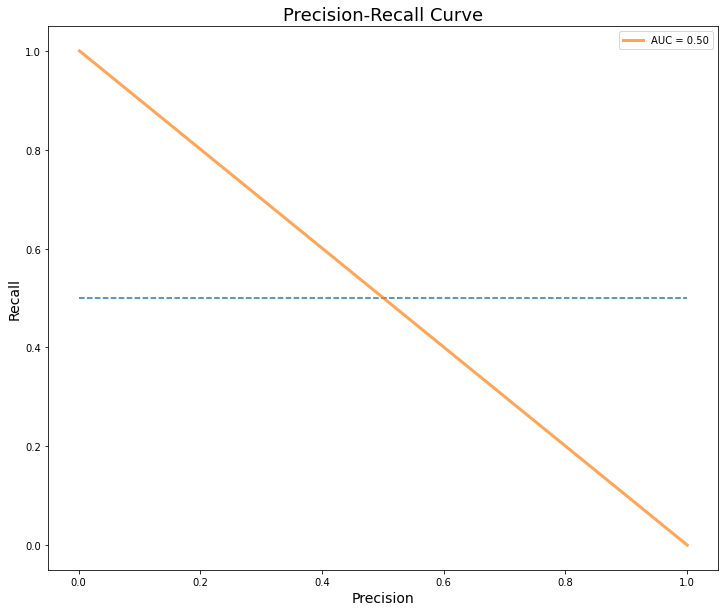

In [176]:
plt.figure(1)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
#plot PR curve
plt.plot(precision, recall, label = "AUC = {:0.2f}".format(AUC_PRcurve), lw = 3, alpha = 0.7)
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

In [177]:
#roc curve

fpr, tpr, thresholds = roc_curve(y_test, y_hat_test)

roc_auc = auc(fpr, tpr)

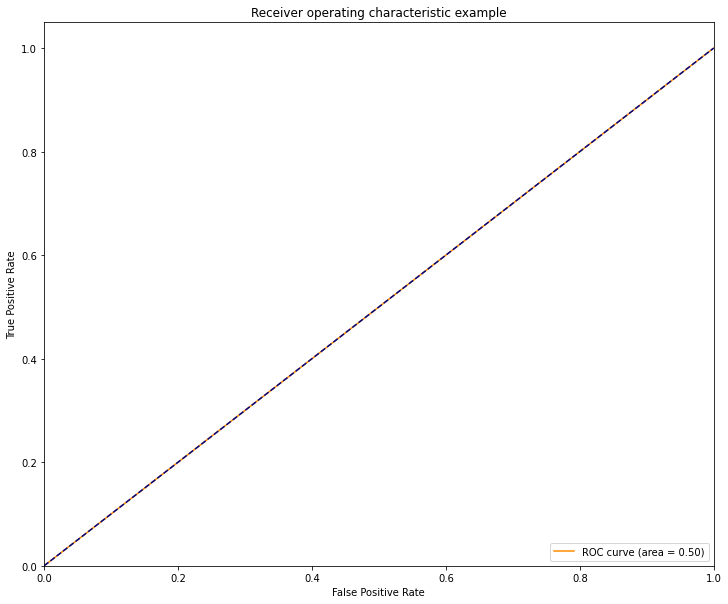

In [178]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [75]:
!pip install tensorflow

     |████████████████████████████████| 207.0 MB 33 kB/s                                    | 61.6 MB 64.0 MB/s eta 0:00:03███████▍| 203.4 MB 40.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 32.2 MB/s            
     |████████████████████████████████| 1.3 MB 70.9 MB/s            
     |████████████████████████████████| 126 kB 41.4 MB/s            
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     |████████████████████████████████| 5.8 MB 29.1 MB/s            
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Preparing metadata (setup.py) ... done
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 1.0 MB 46.3 MB/s            
     |████████████████████████████████| 12.2 MB 44.1 MB/s            
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     |████████████████████████████████| 3.1 MB 31.7 MB/s            
     |████████████████████

In [78]:
#LSTM
import tensorflow as tf

from tensorflow.keras.layers import LSTM, BatchNormalization, Dense
from tensorflow.keras import Model, Input, Sequential

In [143]:
#load data

data_ts = data_raw.copy()

In [183]:
data_ts.head()

,account_id,device_id,balance,processed_at,is_fraud,age_range,number_of_selfies_sent,time_client,cash_out_type_1,cash_out_type_2,cash_out_type_3,cash_out_type_6
0,0,0,0.000167,1.542826e+09,0,0.0,5.0,8.783463e+05,1,0,0,0
1,1,0,0.000533,1.540263e+09,0,1.0,5.0,9.689721e+06,0,0,1,0
2,1,0,0.000347,1.542655e+09,0,1.0,5.0,1.208182e+07,0,0,1,0
3,1,0,0.000572,1.540837e+09,0,1.0,5.0,1.026435e+07,0,0,1,0
4,1,0,0.000346,1.540998e+09,0,1.0,5.0,1.042547e+07,0,0,1,0


In [214]:
pip install "git+https://github.com/tqdm/tqdm.git@devel#egg=tqdm"

  Cloning https://github.com/tqdm/tqdm.git (to revision devel) to /private/var/folders/jn/ck8kvq0d4h7bjzszjkxcp7tw0000gn/T/pip-install-3zel4fb9/tqdm_66e6677ce8a542f48cf9c1c972b6444c
  Running command git clone --filter=blob:none -q https://github.com/tqdm/tqdm.git /private/var/folders/jn/ck8kvq0d4h7bjzszjkxcp7tw0000gn/T/pip-install-3zel4fb9/tqdm_66e6677ce8a542f48cf9c1c972b6444c
  Running command git checkout -b devel --track origin/devel
  Switched to a new branch 'devel'
  Branch 'devel' set up to track remote branch 'devel' from 'origin'.
  Resolved https://github.com/tqdm/tqdm.git to commit 6c930f5d84a30a3c4dc74ff0e1081af7939ae44a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tqdm: filename=tqdm-4.62.4.dev6+g6c930f5-py2.py3-none-any.whl size=76587 sha256=2282293f98a26e1a84b69741393663c7196c9c9d0f7a4b4d479d2531e72d3e4b
  Stored in directory: /private/var/folders/jn/ck8kvq0d4h7

In [215]:
from tqdm import tqdm

In [331]:
def group_by_time_sort(df, group_column, sort_column, debug=False):
    
    
    grouped_sorted = []
    
    unique_accounts = df[group_column].unique()
    
    max_sample_size = max(df.groupby(group_column)[group_column].count())
    
    for unique in tqdm(unique_accounts):
        
        unique_df = df[df[group_column] == unique].copy()
        
        unique_df_sorted = unique_df.sort_values(sort_column, axis=0)
        
        unique_df_sorted.drop(["account_id", "processed_at"],axis=1, inplace=True)
        
        #working with numpy
        unique_sorted = np.array(unique_df_sorted)
        
        unique_sorted = np.expand_dims(unique_sorted, axis=0)
        
        sample_size = unique_sorted.shape[1]
        
        if sample_size < max_sample_size:
            
            value_to_pad = max_sample_size - sample_size
            
            unique_sorted = np.pad(unique_sorted, ((0,0),(0,value_to_pad),(0,0)))   #padding after
            
            assert unique_sorted.shape[1] == max_sample_size
            assert len(unique_sorted.shape) == 3
        
        if unique == 0:
            grouped_sorted = unique_sorted
        
        else:
            grouped_sorted = np.concatenate((grouped_sorted, unique_sorted), axis=0)
            
    assert grouped_sorted.shape == (len(unique_accounts), max_sample_size, 10)
            
        
    return grouped_sorted

In [ ]:
data_grouoped_sorted = group_by_time_sort(data_ts, "account_id", "processed_at")

  3%|█████▍                                                                                                                                                       | 2223/63723 [24:14<15:52:35,  1.08it/s]

In [111]:


train_df, test_df = train_test_split(data_ts, test_size=0.2, stratify=data_ts.is_fraud)
train_df, val_df = train_test_split(data_ts, test_size=0.2, stratify=data_ts.is_fraud)

train_labels = np.array(train_df.pop('is_fraud'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('is_fraud'))
test_labels = np.array(test_df.pop('is_fraud'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [112]:
train_proportion = len(train_labels[train_labels==1])/len(train_labels)
test_proportion = len(test_labels[test_labels==1])/len(test_labels)
val_proportion = len(val_labels[val_labels==1])/len(val_labels)

print("Train proportion", train_proportion)
print("Test proportion", test_proportion)
print("Val proportion", val_proportion)

Train proportion 0.0016313560447852402
Test proportion 0.0016313560447852402
Val proportion 0.0016313560447852402


In [119]:
scaler = MinMaxScaler()

train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (752748,)
Validation labels shape: (188187,)
Test labels shape: (188187,)
Training features shape: (752748, 10)
Validation features shape: (188187, 10)
Test features shape: (188187, 10)


In [126]:
metrics = [tf.keras.metrics.BinaryAccuracy(name="ba"),
           tf.keras.metrics.FalsePositives(name="fp"),
           tf.keras.metrics.AUC(name="auc"),
           tf.keras.metrics.AUC(name="prc", curve='PR')]

In [131]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

model = Sequential([
    Input(train_features.shape[-1],),
    LSTM(8, activation="relu"),
    Dense(1, activation="sigmoid") 
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=metrics,
              callbacks=[early_stopping]
)

model.summary()

ValueError: Input 0 of layer "lstm_5" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 10)

In [ ]:
history = model.fit()